In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\My Book\\Desktop\\Github Projects\\DeepLearning\\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price',axis = 'columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [18]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [7]:
w = np.ones(shape=(df.shape[1]))

b = np.array([1,2,3])
b
#np.dot(w,b.T)

array([1, 2, 3])

In [27]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples= x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T) + b
        
        w_grad = -(2/total_samples) * (x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list
            
w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

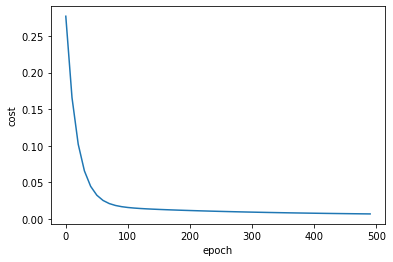

In [28]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [32]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]
    
    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

128.45484403267596

In [34]:
predict(1000,2,w,b)

30.253094462442355

In [35]:
predict(1500,3,w,b)

69.47860785714694

In [56]:
import random

def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples= x.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_samples) * (sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples) * (sample_y-y_predicted)
        
        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.71143366, 0.68049421]), -0.2353203477362414, 0.0015810345797285254)

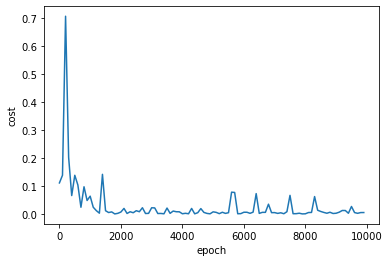

In [57]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd, cost_list_sgd)

In [58]:
predict(2600,4,w_sgd,b_sgd)

128.74502663516884

In [59]:
predict(1000,2,w_sgd,b_sgd)

29.822125457554026

In [60]:
predict(1500,3,w_sgd,b_sgd)

69.34803695293103